In [1]:
# Train on actual task

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [ ]:
print(f"train_dataset: {train_dataset}")
print(f"test_dataset: {test_dataset}")

In [6]:
# Hyperparameters
input_size = 784  # MNIST image size (28x28) flattened
num_classes = 10  # Number of output classes for MNIST (digits 0-9)
num_epochs = 50
batch_size = 64
learning_rate = 0.001

In [7]:
# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
# Shallow model
class ShallowModel(nn.Module):
    def __init__(self):
        super(ShallowModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
# Deep model
class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, num_classes)  # Output layer

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [10]:
# Initialize models
shallow_model = ShallowModel().to(device)
deep_model = DeepModel().to(device)

In [11]:
print(shallow_model.parameters)
# total_params = sum(p.numel() for p in shallow_model.parameters())
shallow_total_params = sum(p.numel() for p in shallow_model.parameters() if p.requires_grad)
print(shallow_total_params)

print(deep_model.parameters)
deep_total_params = sum(p.numel() for p in deep_model.parameters() if p.requires_grad)
print(deep_total_params)

<bound method Module.parameters of ShallowModel(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)>
39760
<bound method Module.parameters of DeepModel(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
)>
16750


In [12]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_shallow = optim.Adam(shallow_model.parameters(), lr=learning_rate)
optimizer_deep = optim.Adam(deep_model.parameters(), lr=learning_rate)

In [13]:
# Training function
def train(model, optimizer, num_epochs):
    # set model to training mode
    model.train()
    loss_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # add loss for each batch to total loss which calculates total loss for the epoch
            total_loss += loss.item()

            # accuracy calculation
            # Get the predicted class by taking the index of the maximum logit along the class dimension
            _, predicted = torch.max(output, 1)
            # Update the number of correct predictions
            correct_predictions += (predicted == target).sum().item()
            # Update the total number of predictions
            total_predictions += target.size(0)

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions
        loss_list.append(avg_loss)
        accuracy_list.append(accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    return loss_list, accuracy_list

Training Shallow Model...
Epoch [1/50], Loss: 0.4227
Epoch [2/50], Loss: 0.2144
Epoch [3/50], Loss: 0.1683
Epoch [4/50], Loss: 0.1376
Epoch [5/50], Loss: 0.1154
Epoch [6/50], Loss: 0.0998
Epoch [7/50], Loss: 0.0868
Epoch [8/50], Loss: 0.0778
Epoch [9/50], Loss: 0.0695
Epoch [10/50], Loss: 0.0635
Epoch [11/50], Loss: 0.0572
Epoch [12/50], Loss: 0.0522
Epoch [13/50], Loss: 0.0475
Epoch [14/50], Loss: 0.0435
Epoch [15/50], Loss: 0.0399
Epoch [16/50], Loss: 0.0368
Epoch [17/50], Loss: 0.0332
Epoch [18/50], Loss: 0.0308
Epoch [19/50], Loss: 0.0280
Epoch [20/50], Loss: 0.0259
Epoch [21/50], Loss: 0.0235
Epoch [22/50], Loss: 0.0214
Epoch [23/50], Loss: 0.0196
Epoch [24/50], Loss: 0.0186
Epoch [25/50], Loss: 0.0173
Epoch [26/50], Loss: 0.0152
Epoch [27/50], Loss: 0.0144
Epoch [28/50], Loss: 0.0130
Epoch [29/50], Loss: 0.0119
Epoch [30/50], Loss: 0.0110
Epoch [31/50], Loss: 0.0099
Epoch [32/50], Loss: 0.0100
Epoch [33/50], Loss: 0.0088
Epoch [34/50], Loss: 0.0084
Epoch [35/50], Loss: 0.0076
Epo

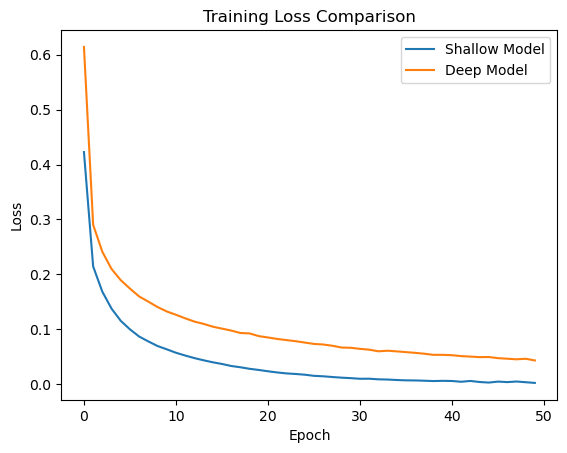

In [14]:
# Train both models
print("Training Shallow Model...")
shallow_loss, shallow_accuracy = train(shallow_model, optimizer_shallow, num_epochs)
print("Training Deep Model...")
deep_loss, deep_accuracy = train(deep_model, optimizer_deep, num_epochs)

# Plot the training loss for both models
plt.figure()
plt.plot(shallow_loss, label='Shallow Model')
plt.plot(deep_loss, label='Deep Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

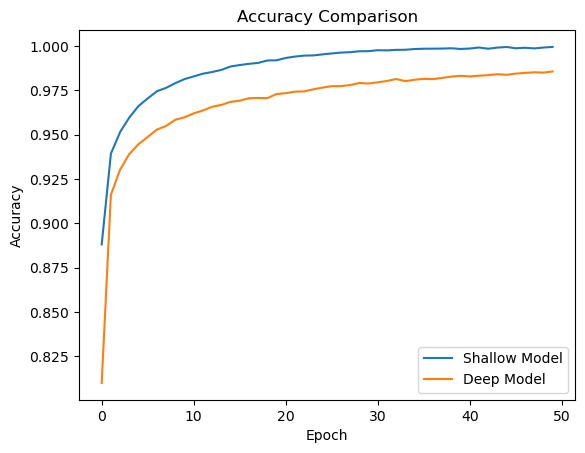

In [17]:
# Plot the accuracy for both models
plt.figure()
plt.plot(shallow_accuracy, label='Shallow Model')
plt.plot(deep_accuracy, label='Deep Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

In [18]:
# Testing function
def test(model):
    # Set the model to evaluation mode
    model.eval()
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # Get the predicted class by taking the index of the maximum logit along the class dimension
            _, predicted = torch.max(output, 1)
            # Update the number of correct predictions
            correct_predictions += (predicted == target).sum().item()
            # Update the total number of predictions
            total_predictions += target.size(0)
    accuracy = (correct_predictions / total_predictions) *100
    return accuracy

# Test both models
shallow_accuracy = test(shallow_model)
deep_accuracy = test(deep_model)

print(f'Shallow Model Testing Accuracy: {shallow_accuracy:.2f}%')
print(f'Deep Model Testing Accuracy: {deep_accuracy:.2f}%')

Shallow Model Testing Accuracy: 97.08%
Deep Model Testing Accuracy: 95.88%
